#### 1. Import Libraries

In [2]:
import pandas as pd 
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [3]:
# !pip install xgboost

#### 2. Functions

In [4]:
def display_columns(df):
    """
    Function to display all columns in a dataframe
    """ 
    with pd.option_context('display.max_columns',None):
        display(df)

#### 3. Preliminary Data Analysis

In [5]:
path_data = "C:/Users/User/Documents"
# path_data = "C:/Users/giovanna.chaves/Downloads"

In [6]:
# Import the data

X_train, X_ivs, y_train, col_names = pickle.load(open(path_data+"/drd2_data.pickle", "rb"))

In [7]:
# Create dataframes based on the data imported

X_train = pd.DataFrame(X_train, columns = col_names)
X_ivs = pd.DataFrame(X_ivs, columns = col_names)
y_train = pd.DataFrame(y_train, columns = ['TARGET'])

In [8]:
# Printing the dimensions

print(f'Dimensions of X_train: {X_train.shape}')
print(f'Dimensions of X_ivs: {X_ivs.shape}')
print(f'Dimensions of y_train: {y_train.shape}')

Dimensions of X_train: (7337, 2132)
Dimensions of X_ivs: (816, 2132)
Dimensions of y_train: (7337, 1)


In [9]:
# Split train test
X_train1, X_test, y_train1, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [10]:
# display_columns(X_train1.describe())

In [11]:
# Getting the numerical variables of X_train1
numerical_columns = [col for col in X_train1.columns if col.startswith('D')]
X_train1_numerical = X_train1[numerical_columns]
X_test_numerical = X_test[numerical_columns]


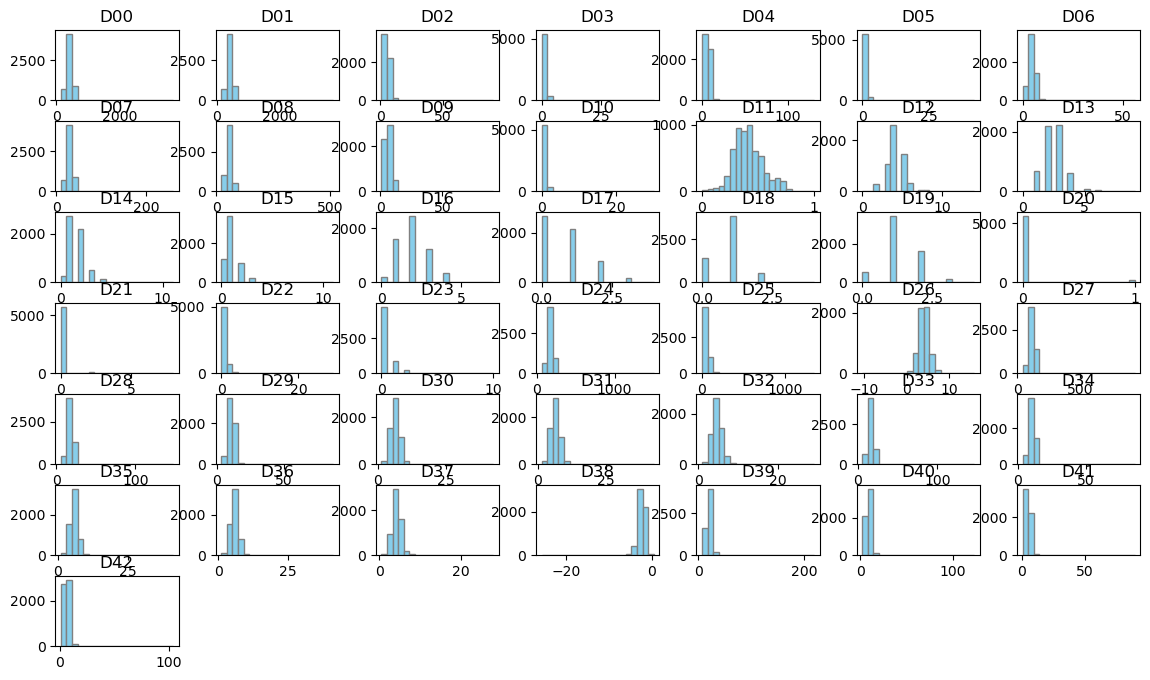

In [12]:
columns_to_plot = X_train1_numerical.columns

# Create histograms for all numeric columns
X_train1_numerical[columns_to_plot].hist(bins=20, figsize=(14, 8), color='skyblue', edgecolor='grey', grid=False)

# Show the plot
plt.show()

In [13]:
# # Filter columns that start with 'F' (which are the binary variables)
# binary_columns = [col for col in X_train1.columns if col.startswith('F')]

# # Display the distribution of each class for columns starting with 'F'
# for column in binary_columns:
#     print(f"Distribution (%) of each class in column '{column}':")
#     print(round(X_train1[column].value_counts(normalize=True) * 100, 2))
#     print()


#### 4. Feature Selection

In [14]:
# Feature Selection using Random Forests
rfr = RandomForestRegressor(n_estimators = 10, random_state=0)
sel = SelectFromModel(estimator=rfr, threshold=.001) 
sel.fit(X_train1, y_train1) # X_train1, y_train1

print("Importances: ", sel.estimator_.feature_importances_)
print("Default threshold: ", sel.threshold_)

features = sel.get_support()
features_selected = np.array(X_train1.columns)[features]
print("The features selected are columns: ", features_selected)

# Data Scaling
scaler   = StandardScaler()
scaler.fit(X_train1[features_selected])
Xt_train = scaler.transform(X_train1[features_selected])
Xt_test  = scaler.transform(X_test[features_selected])

# Transforming the scaled data into a dataframe so we have the columns names
Xt_train = pd.DataFrame(Xt_train, columns = features_selected.tolist())
Xt_test = pd.DataFrame(Xt_test, columns = features_selected.tolist())

# Make the y data to 1-D array
y_train1 = np.ravel(y_train1)
y_test = np.ravel(y_test)


c:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Importances:  [2.71424271e-03 4.02831998e-03 4.23010074e-03 ... 3.79365986e-05
 5.07043232e-04 1.37200200e-04]
Default threshold:  0.001
The features selected are columns:  ['D00' 'D01' 'D02' 'D03' 'D04' 'D05' 'D06' 'D08' 'D09' 'D10' 'D11' 'D12'
 'D14' 'D15' 'D16' 'D19' 'D22' 'D23' 'D24' 'D25' 'D26' 'D27' 'D28' 'D29'
 'D30' 'D31' 'D32' 'D33' 'D34' 'D35' 'D36' 'D37' 'D38' 'D39' 'D40' 'D41'
 'D42' 'FP0009' 'FP0053' 'FP0079' 'FP0099' 'FP0109' 'FP0122' 'FP0132'
 'FP0157' 'FP0173' 'FP0191' 'FP0203' 'FP0244' 'FP0273' 'FP0293' 'FP0305'
 'FP0310' 'FP0319' 'FP0321' 'FP0338' 'FP0353' 'FP0397' 'FP0399' 'FP0401'
 'FP0409' 'FP0429' 'FP0440' 'FP0451' 'FP0459' 'FP0470' 'FP0482' 'FP0493'
 'FP0503' 'FP0508' 'FP0516' 'FP0518' 'FP0521' 'FP0527' 'FP0587' 'FP0621'
 'FP0626' 'FP0636' 'FP0637' 'FP0652' 'FP0674' 'FP0726' 'FP0747' 'FP0776'
 'FP0796' 'FP0810' 'FP0821' 'FP0830' 'FP0836' 'FP0843' 'FP0844' 'FP0846'
 'FP0848' 'FP0866' 'FP0881' 'FP0896' 'FP0913' 'FP0916' 'FP0922' 'FP0933'
 'FP0938' 'FP0939' 'FP0970'

In [15]:
# # Stepwise Feature Selection (forward or backward)
# N,M=X_train1.shape

# # using linear regression for sequential feature selection
# mod=LinearRegression()
# sfs = SequentialFeatureSelector(mod, n_features_to_select=15, direction='forward')
# sfs.fit(X_train1, y_train1)

# # get the relevant columns
# features=sfs.get_support()
# feat_stepwise =np.arange(M)[features]
# feat_stepwise = X_train1.columns[feat_stepwise]
# print("The features selected are columns: ", feat_stepwise)

In [16]:
# lasso = Lasso(alpha=0.0001, max_iter=9999999, random_state=123).fit(X_train1[features_selected], y_train1.values)

# print("The bias is: ", lasso.intercept_)
# print("The other parameters are: ")
# for i, beta in enumerate(lasso.coef_):
#     print("\t B%02d -> %9.3f"% (i+1, beta))

# preds = lasso.predict(X_test[features_selected])
# DisplayRegResults(y_test.values, preds)

In [17]:
# ridge = Ridge(alpha=0.001, max_iter=9999999,random_state=123).fit(X_train1[features_selected], y_train1.values)

# print("The bias is: ", ridge.intercept_)
# print("The other parameters are: ")
# for i, beta in enumerate(ridge.coef_[0]):
#     print("\t B%02d -> %9.3f"% (i+1, beta))

# preds = ridge.predict(X_test[features_selected])
# DisplayRegResults(y_test.values, preds)

#### 5. Dimensionality Reduction (PCA)

In [18]:
# Data Scaling for PCA
scaler_pca   = StandardScaler()
scaler_pca.fit(X_train1)
Xt_train_pca = scaler_pca.transform(X_train1)
Xt_test_pca  = scaler_pca.transform(X_test)

# Perform PCA
pca = PCA(n_components=100) #change the number of components
pca.fit(Xt_train_pca)
tve=0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
print()
print("Actual Eigenvalues:", pca.singular_values_)
# for i,comp in enumerate(pca.components_):
#     print("PC",i, "-->", comp)

PC0 - Variance explained:  0.0256 - Total Variance:  0.0256
PC1 - Variance explained:  0.0131 - Total Variance:  0.0387
PC2 - Variance explained:  0.0126 - Total Variance:  0.0513
PC3 - Variance explained:  0.0115 - Total Variance:  0.0627
PC4 - Variance explained:  0.0097 - Total Variance:  0.0725
PC5 - Variance explained:  0.0076 - Total Variance:  0.0801
PC6 - Variance explained:  0.0074 - Total Variance:  0.0875
PC7 - Variance explained:  0.0069 - Total Variance:  0.0944
PC8 - Variance explained:  0.0066 - Total Variance:  0.1010
PC9 - Variance explained:  0.0064 - Total Variance:  0.1074
PC10 - Variance explained:  0.0063 - Total Variance:  0.1137
PC11 - Variance explained:  0.0059 - Total Variance:  0.1196
PC12 - Variance explained:  0.0058 - Total Variance:  0.1254
PC13 - Variance explained:  0.0055 - Total Variance:  0.1309
PC14 - Variance explained:  0.0053 - Total Variance:  0.1362
PC15 - Variance explained:  0.0051 - Total Variance:  0.1413
PC16 - Variance explained:  0.0051

In [19]:
# Use the Principal Components as the input for the model
X_train_pca=pca.transform(Xt_train_pca)
X_test_pca=pca.transform(Xt_test_pca)

#### 6. Modeling Process

In [20]:
def run_process(models, X_train, X_test, y_train, y_test):

    results = []

    for model_name, model in models:
        model.fit(X_train, y_train) 
        preds = model.predict(X_test) 

        # Calculate metrics
        rmse = mean_squared_error(y_test, preds, squared=False)
        rve = explained_variance_score(y_test, preds)

        # Create model pipeline
        pipeline = []
        pipeline.append(make_pipeline(scaler,model))

        # Save the results in a list
        result = {
            'Model': model_name,
            # 'Pipeline': str(model),
            'Model Pipeline': pipeline,
            'RVE': rve,
            'RMSE': rmse
        }
        results.append(result)

    # Create the final dataframe
    df = pd.DataFrame(results)

    return df

In [21]:
# Define models to be tested

models_to_run = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=20)),
    ('Random Forest', RandomForestRegressor(n_estimators=50, max_depth = 5)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, max_depth = 11)),
    ('Random Forest', RandomForestRegressor(n_estimators=20, max_depth = 25, min_samples_leaf=5)),
    ('KNN',KNeighborsRegressor()),
    ('KNN',KNeighborsRegressor(n_neighbors=7)),
    ('KNN',KNeighborsRegressor(n_neighbors=11)),
    ('KNN',KNeighborsRegressor(leaf_size = 7, weights = "distance", algorithm="kd_tree")),
    ('SVM', SVR(kernel="rbf", degree=3, C=1, epsilon=0.1, gamma="scale")),
    ('Bagging', BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=22)),
    ('Bagging', BaggingRegressor(base_estimator=LinearRegression(), n_estimators=100, random_state=22)),
    ('Bagging', BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100, random_state=22)),
    ('AdaBoost',AdaBoostRegressor(n_estimators = 30, learning_rate=1)),
    ('AdaBoost',AdaBoostRegressor(n_estimators = 50, learning_rate=1)),
    ('AdaBoost',AdaBoostRegressor(n_estimators = 50, learning_rate=1.5)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=40, learning_rate=0.5, random_state=22)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=60, learning_rate=1, random_state=22)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=80, learning_rate=0.5, random_state=22)),
    ('XGBoost', XGBRegressor(n_estimators=30,learning_rate=0.3, random_state=22)),
    ('XGBoost', XGBRegressor(n_estimators=50,learning_rate=0.5, random_state=22)),
    ('XGBoost', XGBRegressor(n_estimators=80,learning_rate=0.5, random_state=22))
]

In [22]:
# Execute the process (Random Forest)
results = run_process(models_to_run, Xt_train, Xt_test, y_train1, y_test)

# Display the results
results

,Model,Model Pipeline,RVE,RMSE
0,Linear Regression,"[(StandardScaler(), LinearRegression())]",0.431925,0.211450
1,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.636259,0.169163
2,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.615426,0.173948
3,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.350354,0.226078
4,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.539154,0.190409
5,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.593852,0.178749
6,KNN,"[(StandardScaler(), KNeighborsRegressor())]",0.589293,0.179908
7,KNN,"[(StandardScaler(), KNeighborsRegressor(n_neig...",0.576522,0.182682
8,KNN,"[(StandardScaler(), KNeighborsRegressor(n_neig...",0.560445,0.186056
9,KNN,"[(StandardScaler(), KNeighborsRegressor(algori...",0.600353,0.177378


In [25]:
results.sort_values(by='RVE', ascending = False)

,Model,Model Pipeline,RVE,RMSE
11,Bagging,"[(StandardScaler(), (DecisionTreeRegressor(ran...",0.636373,0.169140
1,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.636259,0.169163
10,SVM,"[(StandardScaler(), SVR(C=1))]",0.634582,0.169562
2,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.615426,0.173948
13,Bagging,"[(StandardScaler(), (RandomForestRegressor(ran...",0.615176,0.174010
9,KNN,"[(StandardScaler(), KNeighborsRegressor(algori...",0.600353,0.177378
5,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.593852,0.178749
6,KNN,"[(StandardScaler(), KNeighborsRegressor())]",0.589293,0.179908
20,XGBoost,"[(StandardScaler(), XGBRegressor(base_score=No...",0.584624,0.180761
21,XGBoost,"[(StandardScaler(), XGBRegressor(base_score=No...",0.581826,0.181371


In [24]:
# Execute the process with the results from the PCA

df_pca = run_process(models_to_run, X_train_pca, X_test_pca, y_train1, y_test)

# Display the results
display(df_pca)

,Model,Model Pipeline,RVE,RMSE
0,Linear Regression,"[(StandardScaler(), LinearRegression())]",0.418943,0.213793
1,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.567276,0.184542
2,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.546809,0.188899
3,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.326777,0.230126
4,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.495932,0.199216
5,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.544976,0.189287
6,KNN,"[(StandardScaler(), KNeighborsRegressor())]",0.610382,0.175185
7,KNN,"[(StandardScaler(), KNeighborsRegressor(n_neig...",0.593316,0.178994
8,KNN,"[(StandardScaler(), KNeighborsRegressor(n_neig...",0.574945,0.183050
9,KNN,"[(StandardScaler(), KNeighborsRegressor(algori...",0.617832,0.173456


In [26]:
df_pca.sort_values(by='RVE', ascending = False)

,Model,Model Pipeline,RVE,RMSE
10,SVM,"[(StandardScaler(), SVR(C=1))]",0.629920,0.171129
9,KNN,"[(StandardScaler(), KNeighborsRegressor(algori...",0.617832,0.173456
6,KNN,"[(StandardScaler(), KNeighborsRegressor())]",0.610382,0.175185
7,KNN,"[(StandardScaler(), KNeighborsRegressor(n_neig...",0.593316,0.178994
8,KNN,"[(StandardScaler(), KNeighborsRegressor(n_neig...",0.574945,0.183050
11,Bagging,"[(StandardScaler(), (DecisionTreeRegressor(ran...",0.571255,0.183683
1,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.567276,0.184542
2,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.546809,0.188899
13,Bagging,"[(StandardScaler(), (RandomForestRegressor(ran...",0.545873,0.189040
5,Random Forest,"[(StandardScaler(), (DecisionTreeRegressor(max...",0.544976,0.189287


#### 7. Get the predictions for X_ivs using the best model selected

In [73]:
results['Model Pipeline'][11][0][1]

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=22)

In [68]:
# Get the best model
best_model = results['Model Pipeline'][11][0][1]
best_model

RandomForestRegressor()

In [69]:
x_ivs = X_ivs.copy()

In [70]:
scaler   = StandardScaler()
scaler.fit(x_ivs[features_selected])
best_model = best_model.fit(Xt_train, y_train1)
preds = best_model.predict(X_ivs[features_selected])
preds 

array([0.4399541 , 0.44629773, 0.40790854, 0.41588006, 0.38146395,
       0.44147374, 0.43499018, 0.47213973, 0.48069454, 0.42709224,
       0.44662713, 0.38914591, 0.48642638, 0.44221246, 0.41685942,
       0.40522956, 0.44296039, 0.40770446, 0.43444292, 0.45499156,
       0.45142881, 0.46041276, 0.44914208, 0.43877893, 0.46248313,
       0.42930853, 0.42739718, 0.4594049 , 0.45979108, 0.43293306,
       0.40407507, 0.46311953, 0.43919306, 0.39574485, 0.44464568,
       0.41285433, 0.42660276, 0.45422098, 0.41726715, 0.43382193,
       0.39569179, 0.42653803, 0.42961286, 0.45420287, 0.43502063,
       0.48884156, 0.37056696, 0.41966516, 0.44630037, 0.4242982 ,
       0.42472039, 0.48405257, 0.43621826, 0.45050075, 0.42802716,
       0.42595022, 0.48858003, 0.44932116, 0.48729588, 0.44528532,
       0.42932671, 0.48551881, 0.39616901, 0.41650418, 0.33293578,
       0.4138979 , 0.46791012, 0.44475051, 0.44269985, 0.47076744,
       0.44644348, 0.44602234, 0.40940286, 0.42123239, 0.44253

In [71]:
# Save the preds in a txt file
file_path = "C:/Users/User/Documents/31.txt"

# Save the array to the text file with each element on a new line
np.savetxt(file_path, preds, newline='\n')